# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date 
        city_lat =city_weather ['coord']['lat']
        city_lng =city_weather ['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity =city_weather ['main']['humidity']
        city_clouds =city_weather ['clouds']['all']
        city_wind =city_weather ['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | pekan
Processing Record 4 of Set 1 | cockburn town
Processing Record 5 of Set 1 | taunsa
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | bamboo flat
Processing Record 8 of Set 1 | rockland
Processing Record 9 of Set 1 | praia da vitoria
Processing Record 10 of Set 1 | dodge city
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | nanao
Processing Record 13 of Set 1 | maintirano
Processing Record 14 of Set 1 | hastings
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | khandyga
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | vilyuchinsk
Processing Record 21 of Set 1 | port saint john's
Processing Record 22 of Set 1 | kailua-kon

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,8.85,53,75,1.03,CA,1722626889
1,blackmans bay,-43.0167,147.3167,8.74,72,100,0.45,AU,1722626820
2,pekan,3.4836,103.3996,25.06,91,100,1.49,MY,1722627153
3,cockburn town,21.4612,-71.1419,28.36,81,46,9.00,TC,1722627154
4,taunsa,30.7048,70.6505,33.88,51,14,2.38,PK,1722627155


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,8.85,53,75,1.03,CA,1722626889
1,blackmans bay,-43.0167,147.3167,8.74,72,100,0.45,AU,1722626820
2,pekan,3.4836,103.3996,25.06,91,100,1.49,MY,1722627153
3,cockburn town,21.4612,-71.1419,28.36,81,46,9.00,TC,1722627154
4,taunsa,30.7048,70.6505,33.88,51,14,2.38,PK,1722627155


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

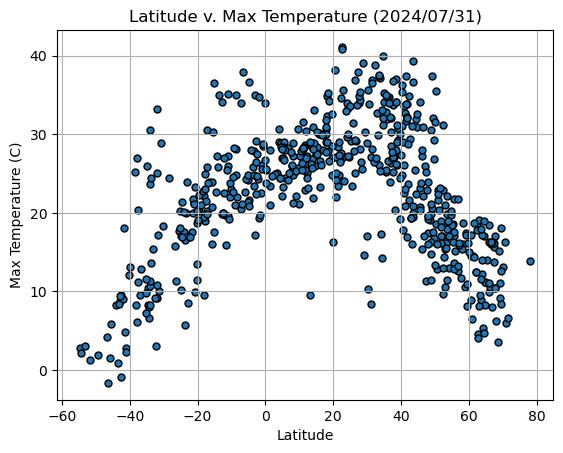

In [8]:
# Build scatter plot for latitude vs. temperature
x=city_data_df['Lat']
y=city_data_df['Max Temp']

plt.scatter(x,y,label='Latitude Vs. Temperature', s=25, edgecolor='black', marker='o')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Latitude v. Max Temperature (2024/07/31)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

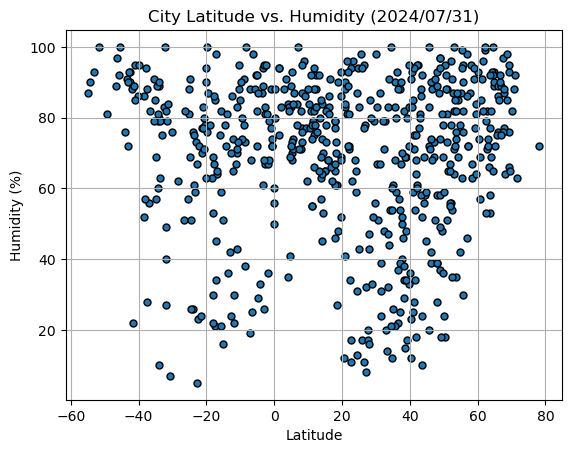

In [9]:
# Build the scatter plots for latitude vs. humidity
x=city_data_df['Lat']
y=city_data_df['Humidity']

plt.scatter(x,y,label='Latitude Vs. Humidity', s=25, edgecolor='black', marker='o')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2024/07/31)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

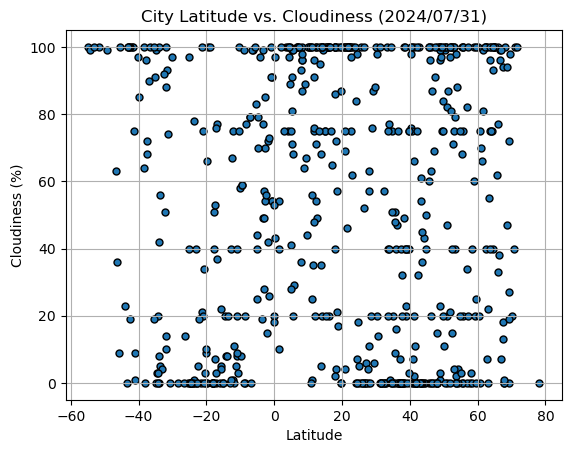

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x=city_data_df['Lat']
y=city_data_df['Cloudiness']

plt.scatter(x,y,label='Latitude Vs. Cloudiness', s=25, edgecolor='black', marker='o')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2024/07/31)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

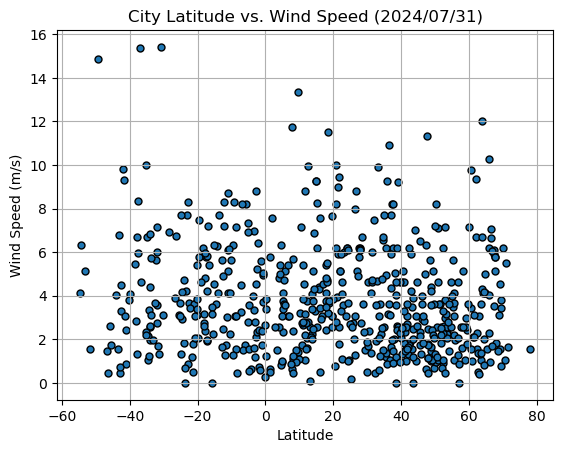

In [11]:
# Build the scatter plots for latitude vs. wind speed
x=city_data_df['Lat']
y=city_data_df['Wind Speed']

plt.scatter(x,y,label='Latitude Vs. Wind Speed', s=25, edgecolor='black', marker='o')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2024/07/31)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
# reminder to self y=mx+b, see lesson 5.3

def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    

    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title("Latitude vs " + title)
    print(f"The r-squared is: {rvalue**2}") 
    plt.show()


In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,8.85,53,75,1.03,CA,1722626889
2,pekan,3.4836,103.3996,25.06,91,100,1.49,MY,1722627153
3,cockburn town,21.4612,-71.1419,28.36,81,46,9.00,TC,1722627154
4,taunsa,30.7048,70.6505,33.88,51,14,2.38,PK,1722627155
5,qaqortoq,60.7167,-46.0333,8.89,69,0,3.45,GL,1722626879


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,8.74,72,100,0.45,AU,1722626820
10,edinburgh of the seven seas,-37.0676,-12.3116,9.50,56,90,15.39,SH,1722626717
12,maintirano,-18.0667,44.0167,22.17,69,0,3.18,MG,1722627114
16,ancud,-41.8697,-73.8203,8.97,88,100,9.81,CL,1722627168
17,adamstown,-25.0660,-130.1015,20.26,81,97,3.67,PN,1722626827


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.3571427983935183


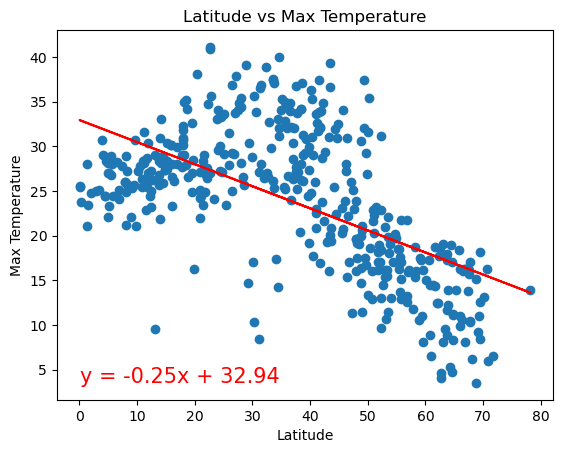

In [49]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
northern_hemi_lat = northern_hemi_df["Lat"]
northern_hemi_temp = northern_hemi_df["Max Temp"]

plot_linear_regression(northern_hemi_lat, northern_hemi_temp,
                       "Latitude vs. Max Temperature",
                       "Latitude", "Max Temperature")



The r-squared is: 0.5541843520239396


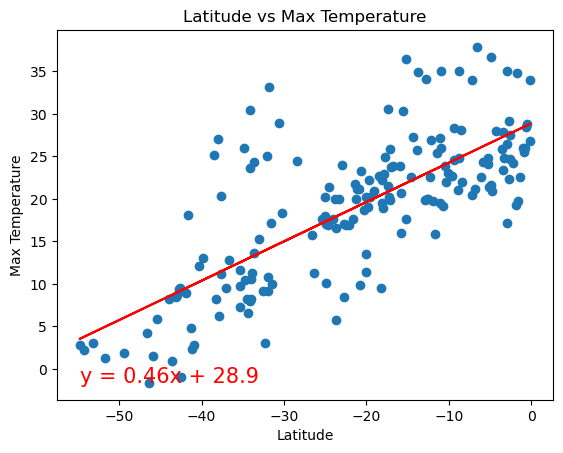

In [50]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
southern_hemi_lat = southern_hemi_df["Lat"]
southern_hemi_temp = southern_hemi_df["Max Temp"]

plot_linear_regression(southern_hemi_lat, southern_hemi_temp,
                       "Latitude vs. Max Temperature",
                       "Latitude", "Max Temperature")

**Discussion about the linear relationship:** When looking  at the Northern hemisphere you can the the temperature go down  as the latitude goes up. So as you are moving away from the equator the temperature lowers. Looking at the southern hemisphere the temperature rises as the latitude rises. In other words the closer you get to the equator the higher the temperature will be. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.00218419030569066


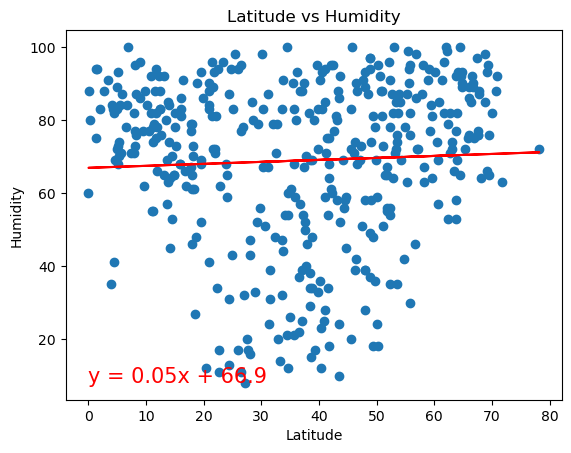

In [51]:
# Northern Hemisphere
# YOUR CODE HERE
northern_hemi_lat = northern_hemi_df["Lat"]
northern_hemi_humidity = northern_hemi_df["Humidity"]

plot_linear_regression(northern_hemi_lat, northern_hemi_humidity,
                       "Latitude vs. Humidity",
                       "Latitude", "Humidity")

The r-squared is: 0.02790912660970886


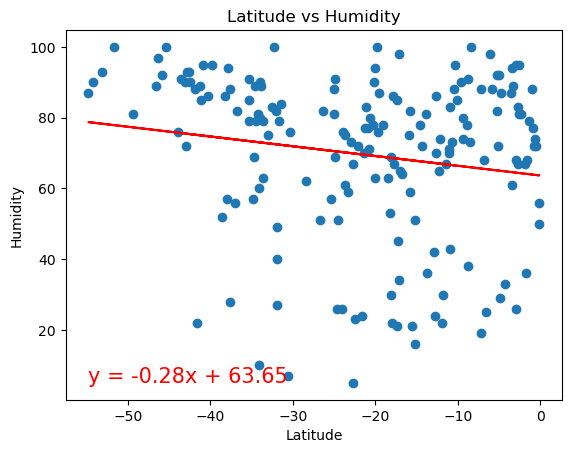

In [52]:
# Southern Hemisphere
# YOUR CODE HERE
southern_hemi_lat = southern_hemi_df["Lat"]
southern_hemi_humidity = southern_hemi_df["Humidity"]

plot_linear_regression(southern_hemi_lat, southern_hemi_humidity,
                       "Latitude vs. Humidity",
                       "Latitude", "Humidity")

**Discussion about the linear relationship:** In the northern hemisphere the humidity stays relatively the same as the latitude rises. The humidity does slightly rise as the latitude does. I dont see much of a coorelation between the humidity and the latitude. In the southern hemisphere it is very similar. There is a slight decrese in humidity as you get closer to the equator but nothing substantial. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.021586921932725264


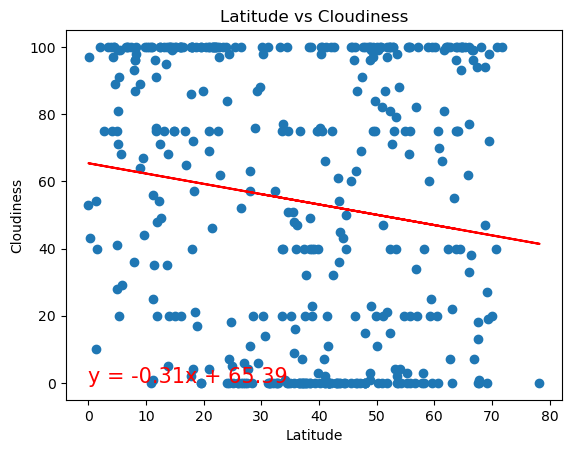

In [53]:
# Northern Hemisphere
# YOUR CODE HERE
northern_hemi_lat = northern_hemi_df["Lat"]
northern_hemi_cloudiness = northern_hemi_df["Cloudiness"]

plot_linear_regression(northern_hemi_lat, northern_hemi_cloudiness,
                       "Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness")

The r-squared is: 0.01703814371894244


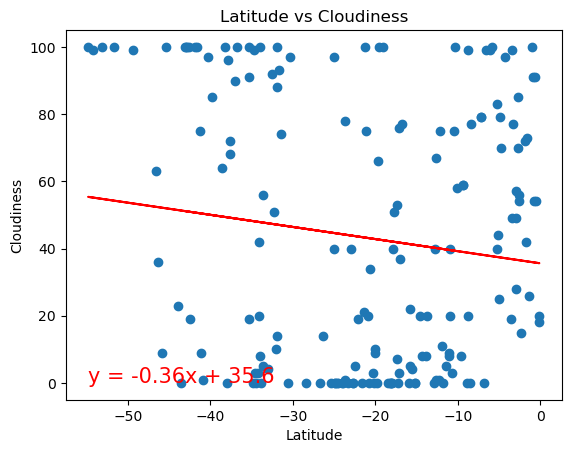

In [54]:
# Southern Hemisphere
# YOUR CODE HERE
southern_hemi_lat = southern_hemi_df["Lat"]
southern_hemi_cloudiness = southern_hemi_df["Cloudiness"]

plot_linear_regression(southern_hemi_lat, southern_hemi_cloudiness,
                       "Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness")

**Discussion about the linear relationship:** Both plots show the higher in latitude the less clouds there are. I dont believe this relates to the distance from the equator but more related to the further north you go the less cloudiness there will be.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00841373050862534


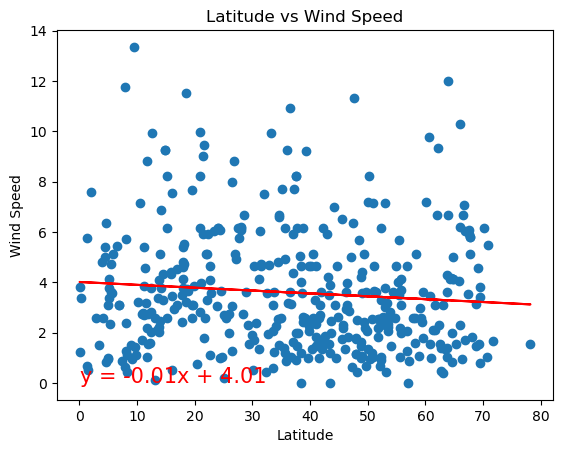

In [55]:
# Northern Hemisphere
# YOUR CODE HERE
northern_hemi_lat = northern_hemi_df["Lat"]
northern_hemi_wind = northern_hemi_df["Wind Speed"]

plot_linear_regression(northern_hemi_lat, northern_hemi_wind,
                       "Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed")

The r-squared is: 0.006813710027747621


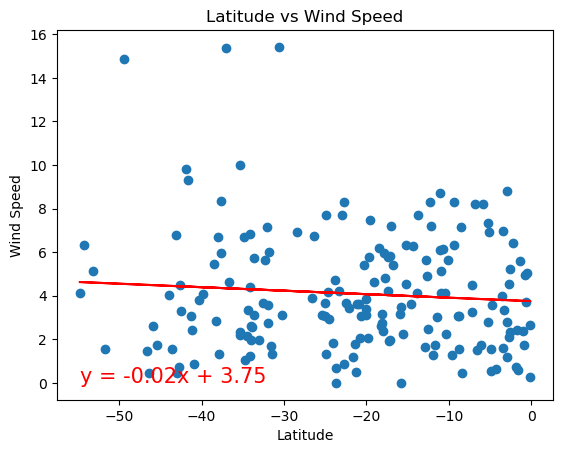

In [56]:
# Southern Hemisphere
# YOUR CODE HERE
southern_hemi_lat = southern_hemi_df["Lat"]
southern_hemi_wind = southern_hemi_df["Wind Speed"]

plot_linear_regression(southern_hemi_lat, southern_hemi_wind,
                       "Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed")

**Discussion about the linear relationship:** Similar to the cloudiness plots, both nothern and southern hemisphere plots show a slight decrease in windspeed the more north you get. As the latitude increases the lower windspeed there is. 